# **Kelompok 4 NLP**


Anggota Kelompok : 

- GIovanny Alberta T (162012133012)
- Najma Attaqiya Alya (162012133015)
- Revina Astri Azzuhri (162012133020)
- Dheandra Azzahra T (162012133028)
- Muhammad Farhan Maulana (162012133032)
- Muhammad Alfian Pratama (162012133037)
- Adam Maurizio W (162012133045)
- Aretha Levi (162012133048) 
- Ergidya liviani (162012133065)
- Mutiara Afifah (162012133091)

# **Import Basic Libraries**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import gensim

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Import Dataset**

In [69]:
df = pd.read_csv('E:\\1.Kuliah\\3. Semester 5 TSD\\1. NLP\\Topic Modelling\\scrapedDetikNEWS2015-2020.csv (2)\\scrapedDetikNEWS2015-2020.csv')
df.head()

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name
0,\r\n
1,Menteri Marwan Imbau Pemda Segera Salurkan Dan...
2,"Luncurkan Buku, Irjen Anton Charliyan Bicara 9..."
3,"Disuruh Buka Wajah, Guru Paskibra Pelaku Penca..."
4,Pelaku Usaha: Solo Harus Bersih dari 'Polisi S...


# **Data Preprocessing**

## Cek dimensi data

In [70]:
df.shape

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(19310, 1)

## Cek tipe data

In [71]:
df.dtypes

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name    object
dtype: object

## Cek missing values

In [72]:
df.isnull().sum()

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name    0
dtype: int64

# **Text Preprocessing**

## Case Folding

In [73]:
df['name_casefold'] = df['name'].str.lower()
df.head()

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,name_casefold
0,\r\n,\r\n
1,Menteri Marwan Imbau Pemda Segera Salurkan Dan...,menteri marwan imbau pemda segera salurkan dan...
2,"Luncurkan Buku, Irjen Anton Charliyan Bicara 9...","luncurkan buku, irjen anton charliyan bicara 9..."
3,"Disuruh Buka Wajah, Guru Paskibra Pelaku Penca...","disuruh buka wajah, guru paskibra pelaku penca..."
4,Pelaku Usaha: Solo Harus Bersih dari 'Polisi S...,pelaku usaha: solo harus bersih dari 'polisi s...


## Text Cleaning

In [74]:
def remove_number(text):
  return re.sub(r'\d+', '', text)

df['name_cleaned'] = df['name_casefold'].apply(remove_number)

def remove_punc(text):
  return text.translate(str.maketrans('','',string.punctuation))

df['name_cleaned'] = df['name_cleaned'].apply(remove_punc)

def remove_whitespace(text):
  return text.strip()

df['name_cleaned'] = df['name_cleaned'].apply(remove_whitespace)

def remove_whitespace_multi(text):
  return re.sub('\s+', ' ', text)

df['name_cleaned'] = df['name_cleaned'].apply(remove_whitespace_multi)

def remove_single_char(text):
  return re.sub(r'\b[a-zA-Z]\b', '', text)

df['name_cleaned'] = df['name_cleaned'].apply(remove_single_char)

df.head()

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:17: DeprecationWarning: invalid escape sequence \s
<>:17: DeprecationWarning: invalid escape sequence \s
<ipython-input-74-271ddb9ac5c4>:17: DeprecationWarning: invalid escape sequence \s
  return re.sub('\s+', ' ', text)


,name,name_casefold,name_cleaned
0,\r\n,\r\n,
1,Menteri Marwan Imbau Pemda Segera Salurkan Dan...,menteri marwan imbau pemda segera salurkan dan...,menteri marwan imbau pemda segera salurkan dan...
2,"Luncurkan Buku, Irjen Anton Charliyan Bicara 9...","luncurkan buku, irjen anton charliyan bicara 9...",luncurkan buku irjen anton charliyan bicara ra...
3,"Disuruh Buka Wajah, Guru Paskibra Pelaku Penca...","disuruh buka wajah, guru paskibra pelaku penca...",disuruh buka wajah guru paskibra pelaku pencab...
4,Pelaku Usaha: Solo Harus Bersih dari 'Polisi S...,pelaku usaha: solo harus bersih dari 'polisi s...,pelaku usaha solo harus bersih dari polisi swa...


## Tokenizing

In [75]:
import nltk
nltk.download('punkt')

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NAJMA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [76]:
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(text):
  return word_tokenize(text)

df['name_token'] = df['name_cleaned'].apply(word_tokenize_wrapper)
print('Hasil Tokenisasi : ') 
df.head()

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Hasil Tokenisasi : 


,name,name_casefold,name_cleaned,name_token
0,\r\n,\r\n,,[]
1,Menteri Marwan Imbau Pemda Segera Salurkan Dan...,menteri marwan imbau pemda segera salurkan dan...,menteri marwan imbau pemda segera salurkan dan...,"[menteri, marwan, imbau, pemda, segera, salurk..."
2,"Luncurkan Buku, Irjen Anton Charliyan Bicara 9...","luncurkan buku, irjen anton charliyan bicara 9...",luncurkan buku irjen anton charliyan bicara ra...,"[luncurkan, buku, irjen, anton, charliyan, bic..."
3,"Disuruh Buka Wajah, Guru Paskibra Pelaku Penca...","disuruh buka wajah, guru paskibra pelaku penca...",disuruh buka wajah guru paskibra pelaku pencab...,"[disuruh, buka, wajah, guru, paskibra, pelaku,..."
4,Pelaku Usaha: Solo Harus Bersih dari 'Polisi S...,pelaku usaha: solo harus bersih dari 'polisi s...,pelaku usaha solo harus bersih dari polisi swa...,"[pelaku, usaha, solo, harus, bersih, dari, pol..."


## Stopwords Removal

In [77]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NAJMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
list_stopwords = stopwords.words('indonesian') + stopwords.words('english')
list_stopwords = set(list_stopwords)
print(list_stopwords)

In [79]:
def remove_stopwords(words):
  return [word for word in words if word not in list_stopwords]

df['name_no_stopwords'] = df['name_token'].apply(remove_stopwords)

print('Hasil Stopwords : \n')
df.head()

Hasil Stopwords : 



c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,name_casefold,name_cleaned,name_token,name_no_stopwords
0,\r\n,\r\n,,[],[]
1,Menteri Marwan Imbau Pemda Segera Salurkan Dan...,menteri marwan imbau pemda segera salurkan dan...,menteri marwan imbau pemda segera salurkan dan...,"[menteri, marwan, imbau, pemda, segera, salurk...","[menteri, marwan, imbau, pemda, salurkan, dana..."
2,"Luncurkan Buku, Irjen Anton Charliyan Bicara 9...","luncurkan buku, irjen anton charliyan bicara 9...",luncurkan buku irjen anton charliyan bicara ra...,"[luncurkan, buku, irjen, anton, charliyan, bic...","[luncurkan, buku, irjen, anton, charliyan, bic..."
3,"Disuruh Buka Wajah, Guru Paskibra Pelaku Penca...","disuruh buka wajah, guru paskibra pelaku penca...",disuruh buka wajah guru paskibra pelaku pencab...,"[disuruh, buka, wajah, guru, paskibra, pelaku,...","[disuruh, buka, wajah, guru, paskibra, pelaku,..."
4,Pelaku Usaha: Solo Harus Bersih dari 'Polisi S...,pelaku usaha: solo harus bersih dari 'polisi s...,pelaku usaha solo harus bersih dari polisi swa...,"[pelaku, usaha, solo, harus, bersih, dari, pol...","[pelaku, usaha, solo, bersih, polisi, swasta, ..."


## Unlisting

In [80]:
df['name_unlisted'] = df['name_no_stopwords'].agg(lambda x: ' '.join(map(str, x)))
df.head()

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,name_casefold,name_cleaned,name_token,name_no_stopwords,name_unlisted
0,\r\n,\r\n,,[],[],
1,Menteri Marwan Imbau Pemda Segera Salurkan Dan...,menteri marwan imbau pemda segera salurkan dan...,menteri marwan imbau pemda segera salurkan dan...,"[menteri, marwan, imbau, pemda, segera, salurk...","[menteri, marwan, imbau, pemda, salurkan, dana...",menteri marwan imbau pemda salurkan dana desa
2,"Luncurkan Buku, Irjen Anton Charliyan Bicara 9...","luncurkan buku, irjen anton charliyan bicara 9...",luncurkan buku irjen anton charliyan bicara ra...,"[luncurkan, buku, irjen, anton, charliyan, bic...","[luncurkan, buku, irjen, anton, charliyan, bic...",luncurkan buku irjen anton charliyan bicara ra...
3,"Disuruh Buka Wajah, Guru Paskibra Pelaku Penca...","disuruh buka wajah, guru paskibra pelaku penca...",disuruh buka wajah guru paskibra pelaku pencab...,"[disuruh, buka, wajah, guru, paskibra, pelaku,...","[disuruh, buka, wajah, guru, paskibra, pelaku,...",disuruh buka wajah guru paskibra pelaku pencab...
4,Pelaku Usaha: Solo Harus Bersih dari 'Polisi S...,pelaku usaha: solo harus bersih dari 'polisi s...,pelaku usaha solo harus bersih dari polisi swa...,"[pelaku, usaha, solo, harus, bersih, dari, pol...","[pelaku, usaha, solo, bersih, polisi, swasta, ...",pelaku usaha solo bersih polisi swasta puasa


## Remove Blank Text

In [81]:
df = df[df['name_unlisted'] != '']
df.head()

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,name_casefold,name_cleaned,name_token,name_no_stopwords,name_unlisted
1,Menteri Marwan Imbau Pemda Segera Salurkan Dan...,menteri marwan imbau pemda segera salurkan dan...,menteri marwan imbau pemda segera salurkan dan...,"[menteri, marwan, imbau, pemda, segera, salurk...","[menteri, marwan, imbau, pemda, salurkan, dana...",menteri marwan imbau pemda salurkan dana desa
2,"Luncurkan Buku, Irjen Anton Charliyan Bicara 9...","luncurkan buku, irjen anton charliyan bicara 9...",luncurkan buku irjen anton charliyan bicara ra...,"[luncurkan, buku, irjen, anton, charliyan, bic...","[luncurkan, buku, irjen, anton, charliyan, bic...",luncurkan buku irjen anton charliyan bicara ra...
3,"Disuruh Buka Wajah, Guru Paskibra Pelaku Penca...","disuruh buka wajah, guru paskibra pelaku penca...",disuruh buka wajah guru paskibra pelaku pencab...,"[disuruh, buka, wajah, guru, paskibra, pelaku,...","[disuruh, buka, wajah, guru, paskibra, pelaku,...",disuruh buka wajah guru paskibra pelaku pencab...
4,Pelaku Usaha: Solo Harus Bersih dari 'Polisi S...,pelaku usaha: solo harus bersih dari 'polisi s...,pelaku usaha solo harus bersih dari polisi swa...,"[pelaku, usaha, solo, harus, bersih, dari, pol...","[pelaku, usaha, solo, bersih, polisi, swasta, ...",pelaku usaha solo bersih polisi swasta puasa
5,Komisi I Protes Australia Suap ABK untuk Halau...,komisi i protes australia suap abk untuk halau...,komisi protes australia suap abk untuk halau ...,"[komisi, protes, australia, suap, abk, untuk, ...","[komisi, protes, australia, suap, abk, halau, ...",komisi protes australia suap abk halau migran ...


# **Apply LDA With Gensim**

# Dictionary

In [82]:
dictionary = gensim.corpora.Dictionary(df['name_no_stopwords'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0 dana
1 desa
2 imbau
3 marwan
4 menteri
5 pemda
6 salurkan
7 anton
8 bicara
9 buku
10 charliyan


# Bag of Words

In [83]:
bow_corpus = [dictionary.doc2bow(doc) for doc in df['name_no_stopwords']]
bow_corpus[999]

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(42, 1),
 (125, 1),
 (130, 1),
 (1836, 1),
 (2277, 1),
 (2278, 1),
 (3213, 1),
 (3214, 1)]

In [84]:
bow_doc_999 = bow_corpus[999]
for i in range(len(bow_doc_999)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_999[i][0], 
                                               dictionary[bow_doc_999[i][0]], 
bow_doc_999[i][1]))

Word 42 ("apresiasi") appears 1 time.
Word 125 ("agung") appears 1 time.
Word 130 ("pilkada") appears 1 time.
Word 1836 ("revisi") appears 1 time.
Word 2277 ("pencalonan") appears 1 time.
Word 2278 ("pkpu") appears 1 time.
Word 3213 ("laksono") appears 1 time.
Word 3214 ("rampungnya") appears 1 time.


c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.297755327627433),
 (1, 0.32845425733468625),
 (2, 0.339718184938749),
 (3, 0.5189269344141667),
 (4, 0.27071160697118),
 (5, 0.39839716728774843),
 (6, 0.4321583971390768)]


c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


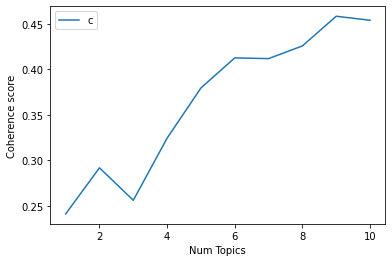

In [87]:
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=bow_corpus, 
                                                        texts=df['name_no_stopwords'], start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [88]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.241105
Num Topics = 2  has Coherence Value of 0.291725
Num Topics = 3  has Coherence Value of 0.256059
Num Topics = 4  has Coherence Value of 0.324348
Num Topics = 5  has Coherence Value of 0.379425
Num Topics = 6  has Coherence Value of 0.412476
Num Topics = 7  has Coherence Value of 0.411644
Num Topics = 8  has Coherence Value of 0.425593
Num Topics = 9  has Coherence Value of 0.458188
Num Topics = 10  has Coherence Value of 0.453774


c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-89-e2ac6a15cfa4>, line 1)

In [ ]:
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])
#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
top_word = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P'])
print(top_word)

    Topic        Word         P
0       0      polisi  0.031517
1       0      pelaku  0.010783
2       0     tangkap  0.010116
3       0  pelantikan  0.009953
4       0   ditangkap  0.009739
..    ...         ...       ...
85      8   indonesia  0.009596
86      8         tim  0.009440
87      8          ri  0.009051
88      8     anggota  0.009034
89      8         mpr  0.006701

[90 rows x 3 columns]


In [ ]:
import gensim
import pyLDAvis.gensim_models
import pyLDAvis
pyLDAvis.enable_notebook()
data = pyLDAvis.gensim_models.prepare(model, bow_corpus, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim-bow.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.152377 -0.101717       1        1  12.331330
8      0.178290 -0.004507       2        1  12.047729
3      0.098097 -0.159794       3        1  11.587884
1      0.202819  0.151988       4        1  11.451455
7     -0.055778 -0.119697       5        1  11.394977
6     -0.132423  0.202186       6        1  11.165163
2      0.096179 -0.039142       7        1  11.092570
0     -0.168546  0.012715       8        1  10.321035
4     -0.066260  0.057969       9        1   8.607856, topic_info=        Term         Freq        Total Category  logprob  loglift
24    polisi  1248.000000  1248.000000  Default  30.0000  30.0000
57    jokowi   999.000000   999.000000  Default  29.0000  29.0000
494    tewas   494.000000   494.000000  Default  28.0000  28.0000
1608    pdip   240.000000   240.000000  Default  27.0000  27.0000
44       kpk  1065.000000  1065.0

# LDA with TF-IDF

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


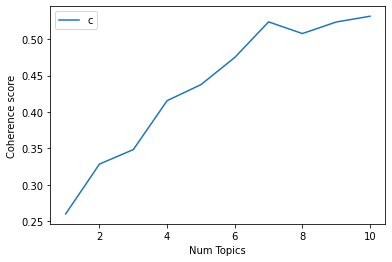

In [ ]:
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=df['name_no_stopwords'], start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.260263
Num Topics = 2  has Coherence Value of 0.328659
Num Topics = 3  has Coherence Value of 0.348448
Num Topics = 4  has Coherence Value of 0.415593
Num Topics = 5  has Coherence Value of 0.43757
Num Topics = 6  has Coherence Value of 0.47481
Num Topics = 7  has Coherence Value of 0.523649
Num Topics = 8  has Coherence Value of 0.507626
Num Topics = 9  has Coherence Value of 0.523474
Num Topics = 10  has Coherence Value of 0.531362


c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=10) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 Word: 0.006*"uu" + 0.005*"dpr" + 0.005*"istri" + 0.005*"anggota" + 0.005*"suami" + 0.005*"trump" + 0.004*"guru" + 0.004*"napi" + 0.004*"kpk" + 0.004*"polisi"
Topic: 1 Word: 0.009*"demo" + 0.006*"asian" + 0.006*"games" + 0.006*"gedung" + 0.006*"budi" + 0.005*"jokowi" + 0.005*"obor" + 0.005*"dpr" + 0.004*"istana" + 0.004*"sambangi"
Topic: 2 Word: 0.012*"kpk" + 0.011*"ott" + 0.007*"bupati" + 0.005*"suap" + 0.005*"syafruddin" + 0.005*"bekasi" + 0.004*"kena" + 0.004*"amin" + 0.004*"jokowi" + 0.004*"politik"
Topic: 3 Word: 0.006*"jk" + 0.005*"agung" + 0.005*"polisi" + 0.005*"miliar" + 0.005*"thamrin" + 0.005*"panggil" + 0.004*"rp" + 0.004*"sd" + 0.004*"agus" + 0.004*"taman"
Topic: 4 Word: 0.007*"dpr" + 0.006*"komisi" + 0.005*"jokowi" + 0.005*"sidang" + 0.004*"mundur" + 0.004*"kpk" + 0.004*"ketua" + 0.004*"papua" + 0.004*"pdip" + 0.004*"sultan"
Topic: 5 Word: 0.006*"corona" + 0.006*"orang" + 0.006*"positif" + 0.005*"tewas" + 0.005*"gempa" + 0.004*"truk" + 0.004*"crane" + 0.004*"menin

In [ ]:
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])
#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
top_word = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P'])
print(top_word)

    Topic        Word         P
0       0          uu  0.006242
1       0         dpr  0.005113
2       0       istri  0.004877
3       0     anggota  0.004710
4       0       suami  0.004677
..    ...         ...       ...
85      8     selasar  0.004800
86      8        demo  0.004525
87      8       tanah  0.004328
88      8  penembakan  0.004247
89      8       viral  0.004165

[90 rows x 3 columns]


c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim
import pyLDAvis.gensim_models
import pyLDAvis
pyLDAvis.enable_notebook()
data = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim-tfidf.html')

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.232231 -0.012660       1        1  13.714888
8     -0.001555 -0.007448       2        1  12.253723
2     -0.062179 -0.198488       3        1  11.640201
0     -0.021203 -0.041329       4        1  11.016798
3      0.006485  0.022621       5        1  10.663675
6     -0.015744 -0.007142       6        1  10.520636
7      0.008757  0.105094       7        1  10.395210
1     -0.086437  0.117261       8        1  10.104362
4     -0.060354  0.022091       9        1   9.690506, topic_info=            Term       Freq       Total Category  logprob  loglift
1612         ott  77.000000   77.000000  Default  30.0000  30.0000
1844        demo  75.000000   75.000000  Default  29.0000  29.0000
2885         hut  41.000000   41.000000  Default  28.0000  28.0000
2611  pelantikan  43.000000   43.000000  Default  27.0000  27.0000
826       gedung  49.000000 

# **Apply LDA with LatentDirichletAllocation**


# **TF-IDF Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features=1000)
vect_text = vect.fit_transform(df['name_unlisted'])

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=10, 
                                    learning_method='online',
                                    random_state=42,max_iter=1) 
lda_top = lda_model.fit_transform(vect_text)

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_top

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.03710218, 0.03710218, 0.03714219, ..., 0.70314257, 0.03710218,
        0.03710218],
       [0.04615448, 0.04615448, 0.04615448, ..., 0.04615448, 0.04615448,
        0.04615448],
       [0.26826748, 0.04074857, 0.04072105, ..., 0.04072105, 0.04074961,
        0.04072105],
       ...,
       [0.04644744, 0.0464386 , 0.04644219, ..., 0.04644542, 0.04644505,
        0.0464386 ],
       [0.13988284, 0.03236471, 0.03236471, ..., 0.30496282, 0.03236471,
        0.03236471],
       [0.26027816, 0.03238967, 0.03237648, ..., 0.40205065, 0.14338629,
        0.03237648]])

In [ ]:
print("Document 1: ")
for i,topic in enumerate(lda_top[1]):
  print("Topic ",i,": ",topic*100,"%")

Document 1: 
Topic  0 :  4.615448191161518 %
Topic  1 :  4.615448191360227 %
Topic  2 :  4.61544819008982 %
Topic  3 :  63.07641446840782 %
Topic  4 :  4.61544819161401 %
Topic  5 :  4.615448189735723 %
Topic  6 :  4.615448191746536 %
Topic  7 :  4.615448194380613 %
Topic  8 :  4.615448191503756 %


c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
index_list = []
topic_list = []

for i in range(len(lda_top[1])):
    index_list.append('topic {}'.format(i))
    topic_list.append(lda_top[1][i])

topic_df = pd.DataFrame(zip(index_list, topic_list), columns=['Topics', 'Probability'])
topic_df

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topics,Probability
0,topic 0,0.046154
1,topic 1,0.046154
2,topic 2,0.046154
3,topic 3,0.630764
4,topic 4,0.046154
5,topic 5,0.046154
6,topic 6,0.046154
7,topic 7,0.046154
8,topic 8,0.046154


c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


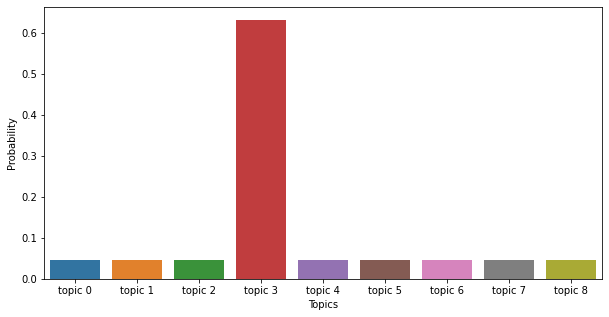

In [ ]:

plt.figure(figsize=(10,5))
sns.barplot(data=topic_df, x='Topics', y='Probability')
plt.show()

In [ ]:
#grab the highest probability word per topics
single_topic = lda_model.components_[0]

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
single_topic.argsort()

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([617, 412, 376, 253, 548,  66, 567, 117, 278, 853, 777, 119, 230,
       224, 123, 760, 759,  98, 578, 269,  32, 829, 934, 258, 298, 132,
       708, 291, 332, 672, 713,  75, 433, 423, 532, 816, 919, 410, 998,
       602, 754, 866, 150, 407, 609, 292,   1,  21, 392, 717, 333, 508,
       712, 360, 849, 911, 464, 204, 337,  48, 366, 263,  13,  60, 901,
       109, 766, 302, 817, 187, 802, 929, 965, 422, 838, 458, 851, 800,
       329, 190, 202, 207, 749, 893, 969, 354, 595,  56, 120, 550, 311,
       178, 308, 660, 772, 837, 226, 784, 748, 261, 685, 485, 788, 363,
       662, 287,  68,  87, 778,   9, 491, 199, 953, 544, 783, 369, 197,
       486, 496, 243, 343, 322, 122, 358, 522, 523, 637, 158, 724, 148,
       781, 827, 203,   6, 667, 653,  39, 520, 571, 560, 753, 867, 312,
       755, 654, 655, 506, 933, 995, 798, 592, 441, 528, 521, 375, 744,
        86, 112,  57, 579, 476, 607, 879,  61, 365, 303, 294,  30, 381,
       819, 882, 994, 581, 393, 304, 980, 626, 671, 161, 166, 72

In [ ]:
#Argsort -----> Index Positions sorted from least ----> Greatest
#Top 10 values
single_topic.argsort()[-10:]

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([502, 338, 904, 484, 222, 264,  10, 535, 341,  42], dtype=int64)

In [ ]:
top_nine_words = single_topic.argsort()[-9:]

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for index in top_nine_words:
    print(vect.get_feature_names()[index])

jabar
terbakar
mahasiswa
dki
gedung
ahok
mobil
jakarta
anies


c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vocab = vect.get_feature_names()
for i, comp in enumerate(lda_model.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
     print('\n')
     print("Topic "+str(i)+": ")
     for t in sorted_words:
            print(t[0],end=" ")



Topic 0: 
anies jakarta mobil ahok gedung dki mahasiswa terbakar jabar masuk 

Topic 1: 
video cerita gerindra viral pdip foto tps kpu motor pks 

Topic 2: 
jokowi dpr kpk anggota demo suap jk pemerintah jelang bupati 

Topic 3: 
corona ri tersangka ott aksi sekolah covid kepala polisi positif 

Topic 4: 
indonesia ketua ditangkap anak polisi australia narkoba pimpinan dpr jaksa 

Topic 5: 
rp pria uu sandiaga polisi juta istri gempa korban rumah 

Topic 6: 
tewas orang menteri china kebakaran ditemukan laut gunung kampanye asap 

Topic 7: 
prabowo warga sidang aceh bekasi penembakan tolak banjir jokowi jalan 

Topic 8: 
kerja agung bandung politik pilkada bayi uang golkar wanita polisi 

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topic_results=lda_model.transform(vect_text)

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topic_results[0].argmax()

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6

In [ ]:
df['topic'] = topic_results.argmax(axis=1)

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,name_casefold,name_cleaned,name_token,name_no_stopwords,name_unlisted,topic
1,Menteri Marwan Imbau Pemda Segera Salurkan Dan...,menteri marwan imbau pemda segera salurkan dan...,menteri marwan imbau pemda segera salurkan dan...,"[menteri, marwan, imbau, pemda, segera, salurk...","[menteri, marwan, imbau, pemda, salurkan, dana...",menteri marwan imbau pemda salurkan dana desa,6
2,"Luncurkan Buku, Irjen Anton Charliyan Bicara 9...","luncurkan buku, irjen anton charliyan bicara 9...",luncurkan buku irjen anton charliyan bicara ra...,"[luncurkan, buku, irjen, anton, charliyan, bic...","[luncurkan, buku, irjen, anton, charliyan, bic...",luncurkan buku irjen anton charliyan bicara ra...,3
3,"Disuruh Buka Wajah, Guru Paskibra Pelaku Penca...","disuruh buka wajah, guru paskibra pelaku penca...",disuruh buka wajah guru paskibra pelaku pencab...,"[disuruh, buka, wajah, guru, paskibra, pelaku,...","[disuruh, buka, wajah, guru, paskibra, pelaku,...",disuruh buka wajah guru paskibra pelaku pencab...,5
4,Pelaku Usaha: Solo Harus Bersih dari 'Polisi S...,pelaku usaha: solo harus bersih dari 'polisi s...,pelaku usaha solo harus bersih dari polisi swa...,"[pelaku, usaha, solo, harus, bersih, dari, pol...","[pelaku, usaha, solo, bersih, polisi, swasta, ...",pelaku usaha solo bersih polisi swasta puasa,7
5,Komisi I Protes Australia Suap ABK untuk Halau...,komisi i protes australia suap abk untuk halau...,komisi protes australia suap abk untuk halau ...,"[komisi, protes, australia, suap, abk, untuk, ...","[komisi, protes, australia, suap, abk, halau, ...",komisi protes australia suap abk halau migran ...,4
...,...,...,...,...,...,...,...
19305,Faisal Amir Tak Tahu Sebab Luka di Kepala: Ini...,faisal amir tak tahu sebab luka di kepala: ini...,faisal amir tak tahu sebab luka di kepala ini ...,"[faisal, amir, tak, tahu, sebab, luka, di, kep...","[faisal, amir, luka, kepala, risiko, demo]",faisal amir luka kepala risiko demo,3
19306,"Kebakaran Hutan di Gunung Ringgit Belum Padam,...","kebakaran hutan di gunung ringgit belum padam,...",kebakaran hutan di gunung ringgit belum padam ...,"[kebakaran, hutan, di, gunung, ringgit, belum,...","[kebakaran, hutan, gunung, ringgit, padam, mun...",kebakaran hutan gunung ringgit padam muncul ti...,2
19307,"Sudah di Rumah, Faisal Amir Masih Pusing dan R...","sudah di rumah, faisal amir masih pusing dan r...",sudah di rumah faisal amir masih pusing dan ra...,"[sudah, di, rumah, faisal, amir, masih, pusing...","[rumah, faisal, amir, pusing, rasakan, sakit]",rumah faisal amir pusing rasakan sakit,5
19308,Semangat WNI di Rusia Antarkan Tim Indonesia R...,semangat wni di rusia antarkan tim indonesia r...,semangat wni di rusia antarkan tim indonesia r...,"[semangat, wni, di, rusia, antarkan, tim, indo...","[semangat, wni, rusia, antarkan, tim, indonesi...",semangat wni rusia antarkan tim indonesia raih...,4


Sumber Referensi

- https://medium.com/@listari.tari/topic-modelling-menggunakan-latent-dirchlect-allocation-part-1-pre-processing-data-dengan-python-87bf5c580923
- https://medium.com/@listari.tari/topic-modeling-menggunakan-latent-dirchlect-allocation-part-2-topic-modeling-with-gensim-c9ffd196cb87
- https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
- https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0 
